In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data into a dataframe
df = pd.read_excel('Finance.xls')

In [3]:
df.isnull().sum()
df.head(5)

,Date,DrReddy,Asian Paint,RIL,Bajaj Finance,Nestle
0,2018-04-02,2132.35,1149.15,892.70,1818.4,8309.1
1,2018-04-03,2128.80,1152.90,898.80,1832.0,8360.7
2,2018-04-04,2091.05,1137.60,895.10,1845.7,8358.8
3,2018-04-05,2109.45,1145.20,906.75,1914.2,8395.7
4,2018-04-06,2124.20,1143.80,909.75,1933.0,8355.5


# Setting Date As Index of the Data Set & Dropping Date Column

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.index = df['Date']
df =df.drop(['Date'], axis=1)

# Plotting All Stocks Without Normalizing

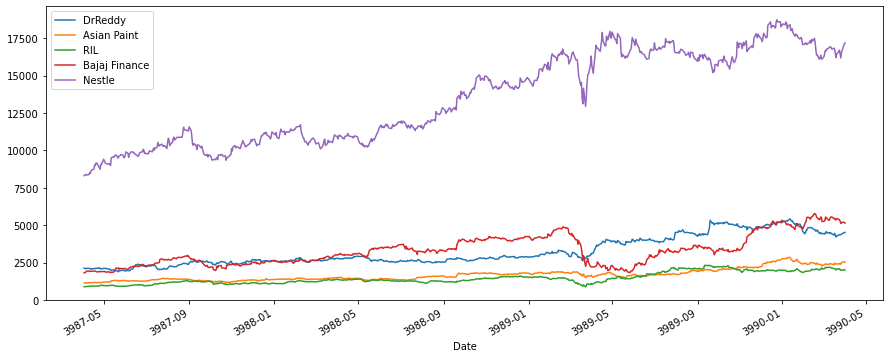

In [5]:
df.plot (figsize = (15, 6))
plt.show()

# Normalize the Stock Price & Plotting

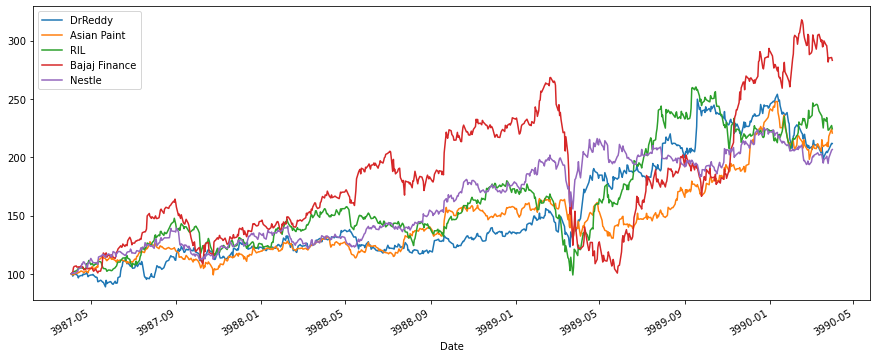

In [6]:
(df / df.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

# Simple Rate of Return

$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1
$$

In [7]:
simple_returns = (df/df.shift(1))-1
# print(simple_returns)
# print(simple_returns.tail(3))

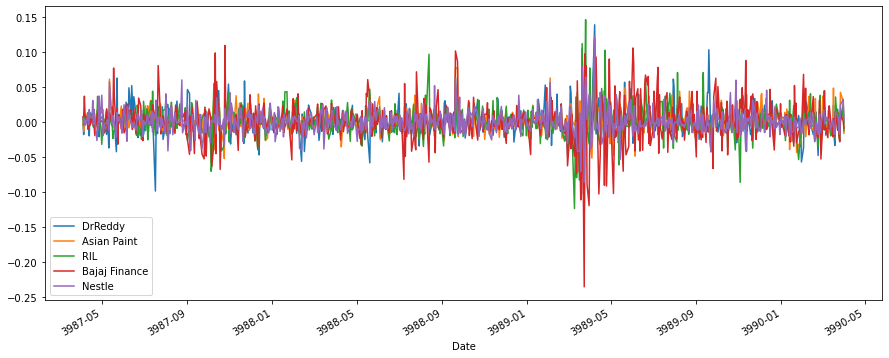

In [8]:
simple_returns.plot (figsize = (15, 6))
plt.show()

# Correaltion Matrix

In [9]:
corr=simple_returns.corr()

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

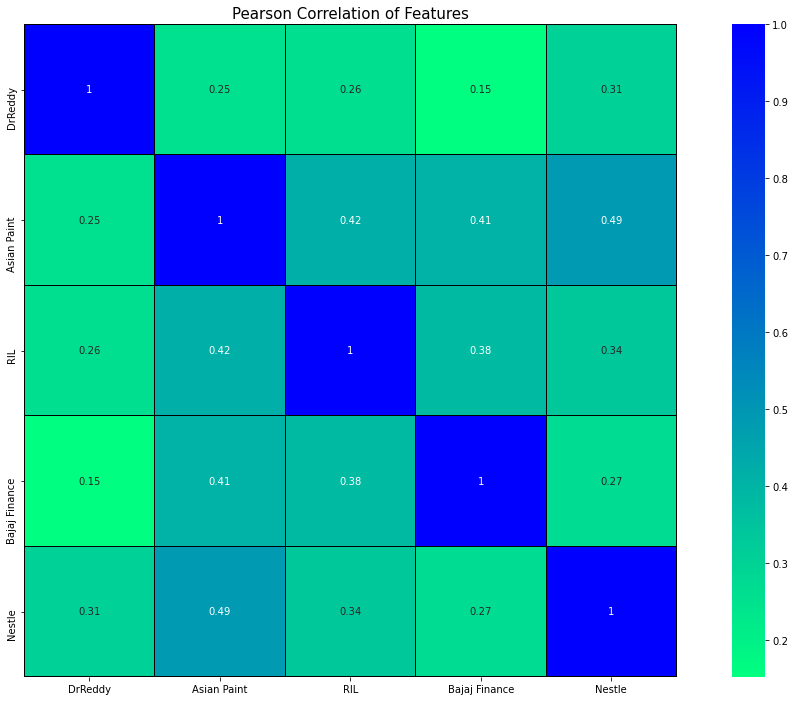

In [10]:
plt.figure(figsize=(20,12))
plt.title('Pearson Correlation of Features', y=1, size=15)
sns.heatmap(corr ,linewidths=0.1,vmax=1.0,square=True, cmap="winter_r", linecolor='Black',annot=True)

# Setting The Investment Weights

In [11]:
num_assets = len(df.columns)
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights
#sum(weights)
# weights = np.array([.2, .2, .2, .2,.2])

array([0.13266535, 0.30125927, 0.15744443, 0.33380562, 0.07482532])

# Dot Product is Sum-Product(weights,returns)

In [12]:
np.dot(simple_returns,weights)

array([            nan,  4.79931441e-03, -4.51941651e-03,  1.79481382e-02,
        4.00040306e-03,  6.50926234e-03, -3.56788408e-03,  1.63940018e-03,
        1.14857273e-03,  2.41631776e-03,  9.02829033e-03,  1.59941326e-03,
       -4.10128449e-03,  1.38185915e-03, -1.11152056e-02,  7.54667719e-03,
        9.16838609e-03, -7.82440771e-03, -8.56760071e-04,  1.18674422e-02,
        3.00296712e-03,  5.77995954e-03, -1.10404247e-02, -8.69959156e-03,
        1.14761339e-02, -6.26120385e-03,  1.72661558e-03, -1.03517931e-02,
        2.89455126e-02,  4.06794940e-03,  8.34217884e-03,  1.66256971e-03,
        2.09735103e-02,  9.57134464e-03, -1.50919414e-02,  1.18403034e-02,
       -1.87626140e-02,  7.41710694e-03,  4.76038621e-03,  4.48292645e-03,
       -9.72432180e-03,  3.26400263e-03,  2.61896952e-03, -5.07355243e-03,
       -5.86490994e-04,  1.62536126e-03,  9.17918193e-03,  1.16954463e-02,
        1.20754553e-02,  8.92507293e-03,  1.01855941e-02,  7.17849049e-04,
        2.86973093e-03,  

In [13]:
annual_return = simple_returns.mean()*252
annual_return*100

DrReddy          29.961505
Asian Paint      30.967405
RIL              33.642803
Bajaj Finance    45.945559
Nestle           28.287060
dtype: float64

# Portfolio Return 

In [14]:
np.dot(annual_return,weights)

0.3605441795989253

# Covariance Matrix

In [15]:
cov=simple_returns.cov()
print(cov)

                DrReddy  Asian Paint       RIL  Bajaj Finance    Nestle
DrReddy        0.000362     0.000087  0.000111       0.000084  0.000100
Asian Paint    0.000087     0.000325  0.000168       0.000211  0.000150
RIL            0.000111     0.000168  0.000496       0.000244  0.000128
Bajaj Finance  0.000084     0.000211  0.000244       0.000830  0.000133
Nestle         0.000100     0.000150  0.000128       0.000133  0.000293


In [16]:
covar_matrix_annual = simple_returns.cov()*252
covar_matrix_annual 

,DrReddy,Asian Paint,RIL,Bajaj Finance,Nestle
DrReddy,0.091150,0.021871,0.028034,0.021065,0.025104
Asian Paint,0.021871,0.081837,0.042257,0.053089,0.037719
RIL,0.028034,0.042257,0.124934,0.061494,0.032362
Bajaj Finance,0.021065,0.053089,0.061494,0.209051,0.033455
Nestle,0.025104,0.037719,0.032362,0.033455,0.073828


# Expected Portfolio Variance

In [17]:
portfolio_variance = np.dot(weights.T, np.dot(simple_returns.cov()*252,weights))
portfolio_variance

0.06640302972003645

# Expected Portfolio Volatility

In [18]:
portfolio_volatility = portfolio_variance**0.5
portfolio_volatility

0.2576878532644417

In [19]:
pfolio_returns = []
pfolio_volatilities = []
wt=[]
for x in range (12000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * simple_returns.mean()) * 252)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(simple_returns.cov() * 252, weights))))
    wt.append(np.str(weights))
    #wt.append(weights)
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
wt=np.array(wt)



pfolio_returns, pfolio_volatilities,wt

(array([0.32057969, 0.32858952, 0.31943164, ..., 0.34613025, 0.34894082,
        0.32053045]),
 array([0.22218785, 0.2233701 , 0.21823144, ..., 0.24574608, 0.2419539 ,
        0.23334338]),
 array(['[0.16249584 0.25400025 0.27505593 0.07616058 0.23228741]',
        '[0.14906082 0.18130045 0.20999897 0.15356057 0.30607919]',
        '[0.24461014 0.11534124 0.25304453 0.08959547 0.29740861]', ...,
        '[0.11079522 0.15167599 0.33583366 0.22285368 0.17884144]',
        '[0.20556168 0.32846651 0.03323245 0.29472674 0.13801262]',
        '[0.0247749  0.32095664 0.28833399 0.07475058 0.2911839 ]'],
       dtype='<U77'))

# Calculating Sharp Ratio, Returns & Volatility

In [20]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities,"Sharp Ratio":pfolio_returns/pfolio_volatilities,"weight":(wt)})

In [21]:
portfolios.head()

,Return,Volatility,Sharp Ratio,weight
0,0.320580,0.222188,1.442832,[0.16249584 0.25400025 0.27505593 0.07616058 0...
1,0.328590,0.223370,1.471054,[0.14906082 0.18130045 0.20999897 0.15356057 0...
2,0.319432,0.218231,1.463729,[0.24461014 0.11534124 0.25304453 0.08959547 0...
3,0.330264,0.230926,1.430174,[0.11807169 0.40771059 0.19527809 0.13608112 0...
4,0.320831,0.215350,1.489812,[0.25036275 0.24422495 0.18046811 0.09942148 0...


# Plotting Portfolio Return & Volatility

Text(0, 0.5, 'Expected Return')

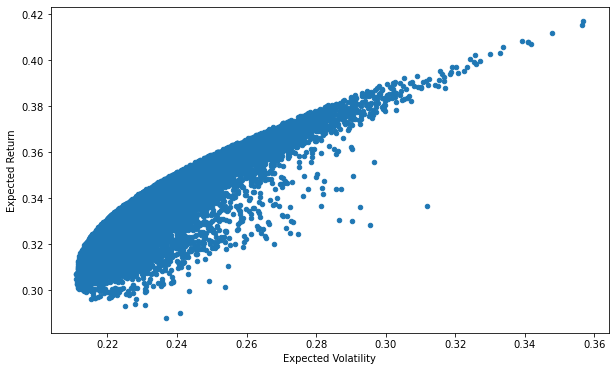

In [22]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [23]:
portfolios["Sharp Ratio"].max()

1.5060648200814002

# Finding Row of Maximum Shrape Ratio To Know The Weights

In [24]:
optimal_weight=portfolios[portfolios["Sharp Ratio"]==portfolios["Sharp Ratio"].max()]
print(optimal_weight)

        Return  Volatility  Sharp Ratio  \
6648  0.330254    0.219283     1.506065   

                                                 weight  
6648  [0.28901179 0.17517669 0.10030147 0.18391478 0...  


In [25]:
# weights=optimal_weight['weight'].to_numpy
weights=np.array([0.29,0.20,0.12,0.17,0.23])
# print(weights)
# type(weights)




In [26]:
initial_investment = int(input("Enter your value: "))
# initial_investment = 100000
print(initial_investment)
type(initial_investment)

Enter your value: 100000
100000


int

# Value at Risk (VaR)
## Checking Returns Are Normally Distributed 

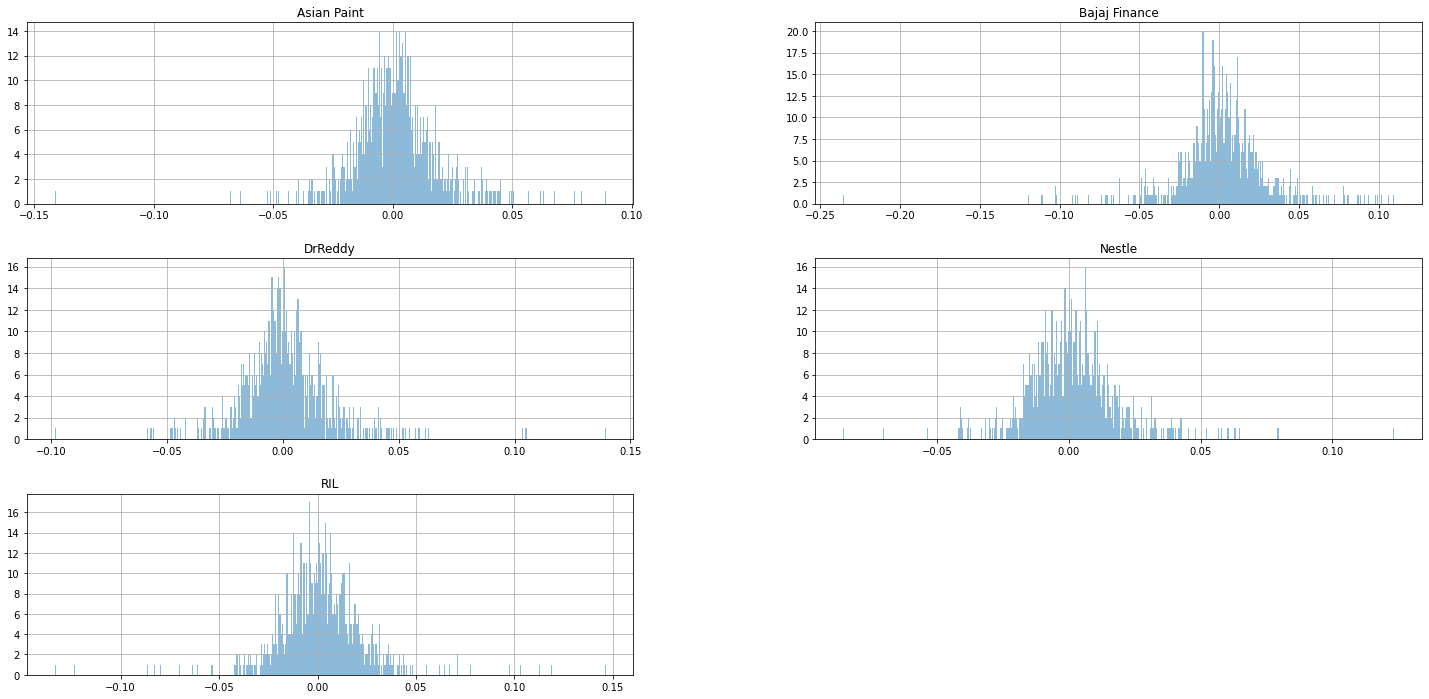

In [27]:
simple_returns.hist(bins=500,alpha=0.5,  figsize=(25, 12))

plt.show()

In [28]:
simple_returns.describe()

,DrReddy,Asian Paint,RIL,Bajaj Finance,Nestle
count,743.000000,743.000000,743.000000,743.000000,743.000000
mean,0.001189,0.001229,0.001335,0.001823,0.001123
std,0.019019,0.018021,0.022266,0.028802,0.017116
min,-0.098513,-0.141536,-0.133650,-0.235680,-0.085798
25%,-0.008574,-0.008109,-0.010124,-0.010388,-0.008943
50%,-0.000151,0.000712,0.000730,0.001628,0.000194
75%,0.009583,0.009624,0.012268,0.014706,0.009548
max,0.139389,0.089114,0.146485,0.109720,0.123591


# Portfolio Mean & STD

In [29]:
avg_rets = simple_returns.mean()
port_mean = np.dot(avg_rets, weights)
print(port_mean)

0.001318897730233067


In [30]:
port_stdev = np.sqrt(weights.T.dot(cov).dot(weights))
print(port_stdev)

0.013890062626390942


# Calculating Return (Mean) & Volatality (STD) of Investment

In [31]:
mean_investment = (1+port_mean) * initial_investment
stdev_investment = initial_investment * port_stdev

# Selecting Confidence Interval (95% Here)

In [32]:
conf_level1 = 0.05

# Finding The Lower Range of Confidence Interval (CI)

In [33]:
from scipy.stats import norm
cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)
cutoff1

97847.17778406308

# Parametric or Variance- Covariance VaR at 95% CI for 1 day (1 DAY VAR)

In [34]:
var_1d1 = initial_investment - cutoff1
var_1d1

2152.822215936918

# Calculating VaR for 45 Days With a Loop

In [35]:
var_array = []
num_days = int(45)
for x in range(1, num_days+1):    
    var_array.append(np.round(var_1d1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * np.sqrt(x),2)))

1 day VaR @ 95% confidence: 2152.82
2 day VaR @ 95% confidence: 3044.55
3 day VaR @ 95% confidence: 3728.8
4 day VaR @ 95% confidence: 4305.64
5 day VaR @ 95% confidence: 4813.86
6 day VaR @ 95% confidence: 5273.32
7 day VaR @ 95% confidence: 5695.83
8 day VaR @ 95% confidence: 6089.1
9 day VaR @ 95% confidence: 6458.47
10 day VaR @ 95% confidence: 6807.82
11 day VaR @ 95% confidence: 7140.1
12 day VaR @ 95% confidence: 7457.59
13 day VaR @ 95% confidence: 7762.11
14 day VaR @ 95% confidence: 8055.12
15 day VaR @ 95% confidence: 8337.84
16 day VaR @ 95% confidence: 8611.29
17 day VaR @ 95% confidence: 8876.31
18 day VaR @ 95% confidence: 9133.65
19 day VaR @ 95% confidence: 9383.93
20 day VaR @ 95% confidence: 9627.71
21 day VaR @ 95% confidence: 9865.47
22 day VaR @ 95% confidence: 10097.63
23 day VaR @ 95% confidence: 10324.57
24 day VaR @ 95% confidence: 10546.63
25 day VaR @ 95% confidence: 10764.11
26 day VaR @ 95% confidence: 10977.28
27 day VaR @ 95% confidence: 11186.39
28 day 

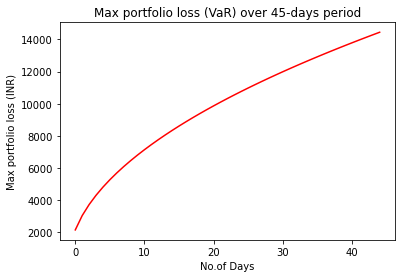

In [36]:
plt.xlabel("No.of Days")
plt.ylabel("Max portfolio loss (INR)")
plt.title("Max portfolio loss (VaR) over 45-days period")
plt.plot(var_array, "r")

# Monte Carlo Simulation
## Calculating Portfolio Mean,Variance, Drift Component & Probability Value Attached to it

In [37]:
port_var =(weights.T.dot(cov).dot(weights))
print(port_var)

0.00019293383976506245


In [38]:
drift =port_mean - (0.5 * port_var )
drift

0.0012224308103505358

In [39]:
norm.ppf(0.95)

1.6448536269514722

# Generating Z stats for random variables

In [40]:
t_intervals = 45
iterations = 100

daily_returns_forecasted = np.exp(drift + port_stdev * norm.ppf(np.random.rand(t_intervals, iterations)))

# Daily Returns Forecasted

$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$
<br />
$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 
$$...$$
<br />  

$$
S_{t+29} = S_{t+28} \mathbin{\cdot} daily\_return_{t+29}
$$

In [41]:
daily_returns_forecasted[0]

array([0.98413535, 1.01269344, 1.00104378, 0.98781726, 0.99413728,
       1.01447181, 0.97130619, 0.98096499, 0.99683804, 0.98180881,
       0.9889279 , 0.99605869, 1.03305895, 1.00189834, 0.98508481,
       1.01288092, 0.99495878, 0.99458747, 1.02514679, 0.98642503,
       0.99334839, 1.00307816, 1.00820564, 0.99880748, 0.97142051,
       0.99773875, 1.01095295, 1.01386272, 0.99836632, 0.99718118,
       1.01983583, 1.00779364, 0.99348721, 1.0157713 , 1.0025541 ,
       0.99688397, 0.9951551 , 1.01083528, 1.00458818, 1.00485057,
       0.9947322 , 0.99486449, 1.00301607, 0.98079638, 1.00627515,
       1.04131655, 0.97552451, 0.99454123, 0.98300316, 1.01662955,
       0.98252449, 0.99618248, 0.98253248, 1.01188208, 1.00599744,
       0.99919087, 1.00193233, 0.99050059, 0.98220952, 1.01205555,
       1.01026529, 1.01436375, 1.00998271, 0.99133452, 1.00293577,
       0.99465014, 1.01313873, 0.99461167, 1.01391555, 0.97058362,
       0.98197105, 1.00107481, 0.99660055, 1.01447644, 0.99527

In [42]:
S0 = initial_investment

# Create an Empty Array to Capture Simulated Data  

In [43]:
price_list = np.zeros_like(daily_returns_forecasted)

# Putting Investment Price in First Row

In [44]:
price_list[0] = S0
price_list

array([[100000., 100000., 100000., ..., 100000., 100000., 100000.],
       [     0.,      0.,      0., ...,      0.,      0.,      0.],
       [     0.,      0.,      0., ...,      0.,      0.,      0.],
       ...,
       [     0.,      0.,      0., ...,      0.,      0.,      0.],
       [     0.,      0.,      0., ...,      0.,      0.,      0.],
       [     0.,      0.,      0., ...,      0.,      0.,      0.]])

In [45]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns_forecasted[t]

# Plotting the Predicted Price of Investment

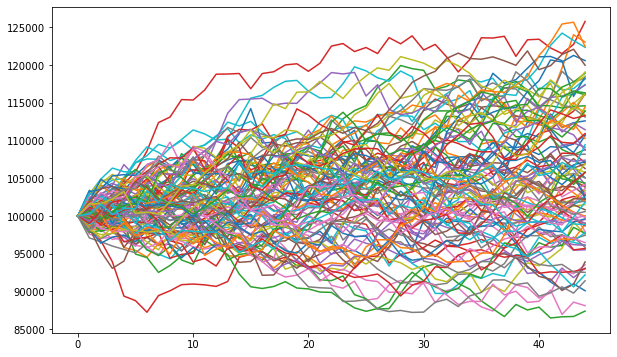

In [46]:
plt.figure(figsize=(10,6))
plt.plot(price_list);

# Getting the Mean of Price

In [47]:
price_list[1].mean()

100407.13536672303

In [48]:
sim_mean = []
i = len(price_list)
for x in range (i-1):
    sim_mean.append(price_list[x].mean())

In [49]:
sim_mean

[100000.0,
 100407.13536672303,
 100486.79848339736,
 100675.19650972867,
 100818.59663211487,
 100828.70588264568,
 101108.10927793129,
 101362.26633557092,
 101415.73084430255,
 101573.23232171324,
 102080.46861933178,
 101914.02434760312,
 102077.9410847935,
 102211.45612987778,
 102235.49000023294,
 102404.69640065306,
 102548.0828113927,
 102552.22184270663,
 102835.76868906736,
 102788.95887493138,
 102965.11837024642,
 102944.50366724335,
 103267.53270076969,
 103354.32369917173,
 103495.1575006316,
 103494.96992552651,
 103754.77704916564,
 103612.44275636938,
 103835.25724275145,
 103930.28565808364,
 104102.96512105284,
 104200.13478444844,
 104391.16062031258,
 104432.5306223859,
 104580.40865664171,
 104639.750099328,
 104823.35790430674,
 104661.02772908786,
 104862.81084604807,
 105000.53831290673,
 105041.95307695348,
 105228.10104483753,
 105302.25997924073,
 105514.10781715316]

# Plotting the Price of Investment

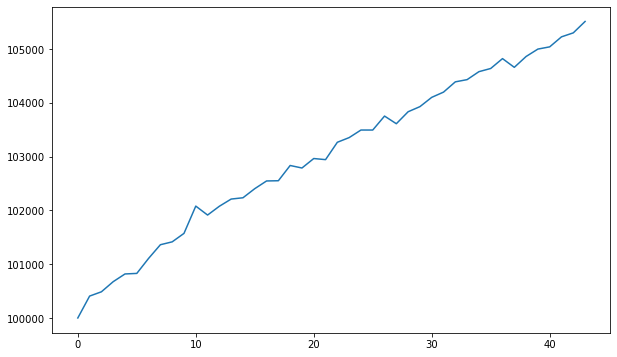

In [50]:
plt.figure(figsize=(10,6))
plt.plot(sim_mean);